<a href="https://colab.research.google.com/github/jinxiqinghuan/learn_pytorch/blob/main/%E9%BE%99%E6%9B%B2%E8%89%AF%E8%80%81%E5%B8%88%E8%AF%BE%E7%A8%8B%E7%AC%94%E8%AE%B0/06_%E9%9A%8F%E6%9C%BA%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. 随机梯度下降

In [10]:
import torch
from torch.nn import functional as F
from matplotlib import pyplot as plt

## 激活函数与loss的梯度

### 激活函数
* sigmoid
* tanh
* relu

In [36]:
a = torch.linspace(-5, 5, 100)

In [37]:
torch.sigmoid(a)

tensor([0.0067, 0.0074, 0.0082, 0.0090, 0.0100, 0.0110, 0.0122, 0.0135, 0.0149,
        0.0164, 0.0182, 0.0201, 0.0221, 0.0244, 0.0270, 0.0297, 0.0328, 0.0362,
        0.0399, 0.0439, 0.0483, 0.0532, 0.0585, 0.0644, 0.0707, 0.0776, 0.0852,
        0.0934, 0.1023, 0.1120, 0.1224, 0.1337, 0.1458, 0.1589, 0.1728, 0.1878,
        0.2036, 0.2205, 0.2384, 0.2572, 0.2770, 0.2976, 0.3192, 0.3415, 0.3646,
        0.3883, 0.4125, 0.4372, 0.4622, 0.4874, 0.5126, 0.5378, 0.5628, 0.5875,
        0.6117, 0.6354, 0.6585, 0.6808, 0.7024, 0.7230, 0.7428, 0.7616, 0.7795,
        0.7964, 0.8122, 0.8272, 0.8411, 0.8542, 0.8663, 0.8776, 0.8880, 0.8977,
        0.9066, 0.9148, 0.9224, 0.9293, 0.9356, 0.9415, 0.9468, 0.9517, 0.9561,
        0.9601, 0.9638, 0.9672, 0.9703, 0.9730, 0.9756, 0.9779, 0.9799, 0.9818,
        0.9836, 0.9851, 0.9865, 0.9878, 0.9890, 0.9900, 0.9910, 0.9918, 0.9926,
        0.9933])

<function matplotlib.pyplot.show>

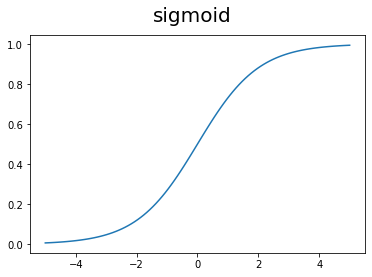

In [38]:
plt.figure('sigmlid')
plt.plot(a, torch.sigmoid(a))
plt.suptitle('sigmoid', fontsize=20)
plt.show

Text(0.5, 0.98, 'tanh')

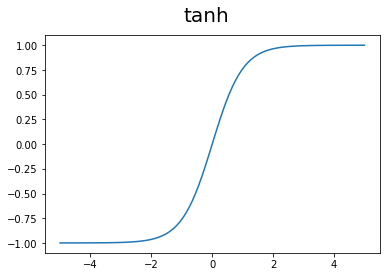

In [39]:
a = torch.linspace(-5, 5, 100)
torch.tanh(a)
plt.plot(a, torch.tanh(a))
plt.suptitle('tanh', fontsize=20)


Text(0.5, 0.98, 'relu')

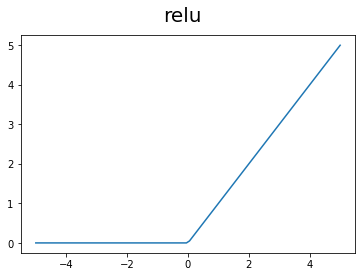

In [40]:
F.relu(a)
plt.plot(a, torch.relu(a))
plt.suptitle('relu', fontsize=20)

### 损失函数
* Mean Squared Error(MSE)
* Cross Entropy Loss
  * binary
  * multi-class
  * +softmax
  * Leave it to Logistic Regression Part

### Autograd.grad

In [60]:
x = torch.ones(1).float()
x

tensor([1.])

In [61]:
w = torch.full([1], 2).float()
w

tensor([2.])

In [62]:
mse = F.mse_loss(torch.ones(1), x*w)
mse

tensor(1.)

In [63]:
# torch.autograd.grad(mse, [w])
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [64]:
w.requires_grad_()

tensor([2.], requires_grad=True)

In [65]:
# torch.autograd.grad(mse, [w])
# 前边图已经建好了，需要重建

In [66]:
mse = F.mse_loss(torch.ones(1), x*w)

In [67]:
torch.autograd.grad(mse, [w])

(tensor([2.]),)